<a href="https://colab.research.google.com/github/nathencinoza/pandas-movies-database/blob/main/V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/Orga 2/Movie dataset/movies.csv', usecols = ['id', 'genres'], low_memory=False)

In [ ]:
movies = movies[['id', 'genres']]
movies

,id,genres
0,862,"Animation,Comedy,Family"
1,8844,"Adventure,Fantasy,Family"
2,15602,"Romance,Comedy"
3,31357,"Comedy,Drama,Romance"
4,11862,Comedy
...,...,...
45461,439050,"Drama,Family"
45462,111109,Drama
45463,67758,"Action,Drama,Thriller"
45464,227506,NaN


In [ ]:
movies['genres'] = movies['genres'].str.split(',')
movies = movies.explode('genres')
movies.head(10)

,id,genres
0,862,Animation
0,862,Comedy
0,862,Family
1,8844,Adventure
1,8844,Fantasy
1,8844,Family
2,15602,Romance
2,15602,Comedy
3,31357,Comedy
3,31357,Drama


In [ ]:
df = movies.pivot_table(index=movies.index, columns='genres', values = 'id', aggfunc='count').fillna(0)

In [ ]:
df

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45460,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45461,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45462,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df2 = df[["Crime", "Mystery", "Thriller","Horror","Fantasy","Family",'Animation', 'Science Fiction', 'Action', 'Adventure', 'Documentary', 'Music', 'Comedy', 'Drama', 'Romance']]
df2.columns = ['Crimen', 'Misterio', 'Suspenso', 'Horror', 'Fantasía','Familiar', 'Animación', 'Ciencia Ficción', 'Acción', 'Aventura', 'Documental', 'Musical', 'Comedia', 'Drama', 'Romance']

In [ ]:
df3 = df2.corr().apply(lambda x: x *100).apply(lambda x: round(x, 0))

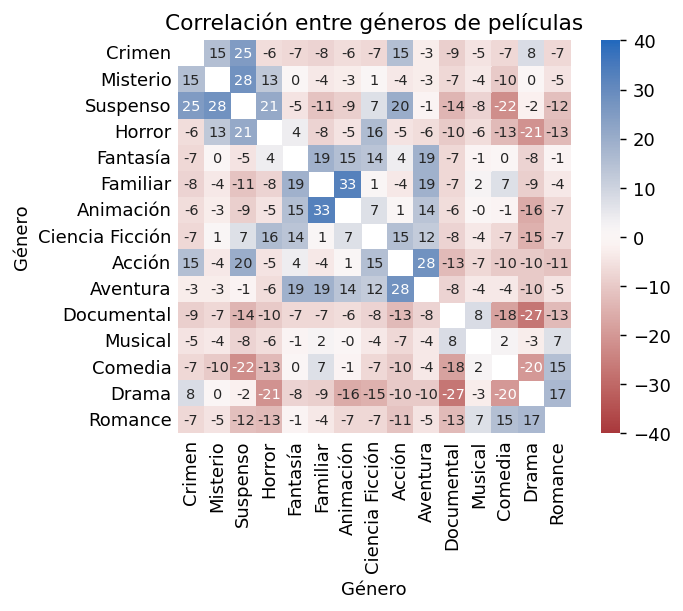

In [ ]:
plt.figure(dpi = 125)
sns.violinplot(data=df, y='popularity', x='genre', palette=['#83C1F3'])
plt.xticks(rotation=90)
plt.ylabel("Popularidad de las canciones")
plt.xlabel("Géneros")
plt.title("Promedio de popularidad de las canciones según su género")
plt.ylim(0, 100)
plt.show()